In [1]:
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import nibabel as nib
import os

In [2]:
base_id = '0272_00'
path = '/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/malignancy_fold0_seed123/id/input'
img = nib.load(f'{path}/{base_id}.nii.gz')
path_entr = '/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/malignancy_fold0_seed123/id/pred_entropy'
entr = nib.load(f'{path_entr}/{base_id}.nii.gz')

gt_path = '/fast/AG_Kainmueller/data/ValUES/FirstCycle/Dropout/test_results/malignancy_fold0_seed123/id/gt_seg'
gt_masks = []
for i in range(4):
    fname = f"{base_id}_{i:02d}.nii.gz"
    full_path = os.path.join(gt_path, fname)
    if os.path.exists(full_path):
        gt = nib.load(full_path).get_fdata()
        gt_masks.append(gt)
gt_stack = np.stack(gt_masks, axis=-1)

In [ ]:
data_img = img.get_fdata()
data_entr = entr.get_fdata()
data_gt = np.any(gt_stack, axis=-1).astype(np.uint8) #consensus
print(f"Image shape: {data_img.shape}, Raters consensus: {data_gt.shape}, Entropy shape: {data_entr.shape}")

Image shape: (64, 64, 64), Raters consensus: (64, 64, 64, 4), Entropy shape: (64, 64, 64)


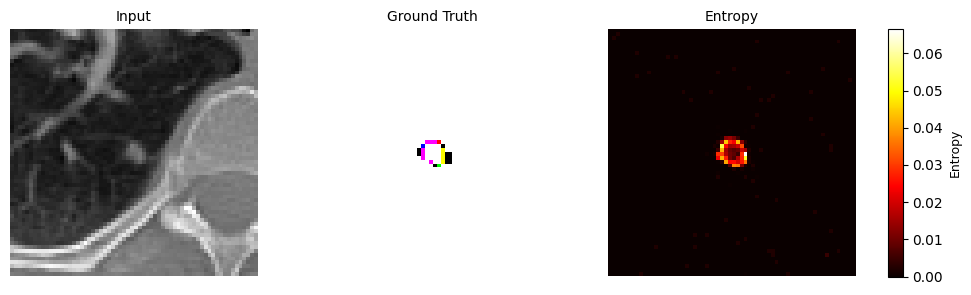

In [4]:
# Prepare slices
slice1 = data_img[:, :, data_img.shape[2] // 2]
slice_gt = data_gt[:, :, data_gt.shape[2] // 2]
slice2 = data_entr.mean(-1) #data_entr[:, :, data_entr.shape[2] // 2]

# Create figure with gridspec: 3 images + 1 colorbar
fig = plt.figure(figsize=(10, 3))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])  # 3 images, 1 colorbar

# Axes for images
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
cax = plt.subplot(gs[3])  # colorbar axis

# Plot input
im0 = ax0.imshow(slice1, cmap='gray')
ax0.set_title('Input', fontsize=10)
ax0.axis('off')

# Plot ground truth
im1 = ax1.imshow(slice_gt, cmap='gray')
ax1.set_title('Ground Truth', fontsize=10)
ax1.axis('off')

# Plot entropy
im2 = ax2.imshow(slice2, cmap='hot')
ax2.set_title('Entropy', fontsize=10)
ax2.axis('off')

# Colorbar for entropy image
cbar = fig.colorbar(im2, cax=cax)
cbar.set_label('Entropy', fontsize=9)

plt.tight_layout()
plt.show()